In [1]:
import pandas as pd

payments = pd.read_csv('./csv/olist_order_payments_dataset.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Payment types

In [2]:
payments_type = payments.groupby(by="payment_type").agg({'payment_value': 'mean', 'order_id': 'count'})
payments_type.sort_values(by='order_id', ascending=False, inplace=True)
payments_type

,payment_value,order_id
payment_type,,
credit_card,163.319021,76795
boleto,145.034435,19784
voucher,65.703354,5775
debit_card,142.570170,1529
not_defined,0.000000,3


### Count of sales

In [3]:
import matplotlib.pyplot as plt

result = plt.bar(payments_type.index, payments_type['order_id'], color=('#0c29d0', '#ff5900', '#f2c80f', '#17d499', '#17d499'))
result

<BarContainer object of 5 artists>

In [4]:
sales = pd.read_csv('./csv/olist_orders_dataset.csv')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
sales = pd.merge(sales, payments, how='inner')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [6]:
dummies = sales.payment_type.str.get_dummies()
dummies.head()

,boleto,credit_card,debit_card,not_defined,voucher
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,0,1,0,0,0


In [7]:
sales_payment = pd.concat([sales, dummies], axis=1)
sales_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,0,1,0,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,0,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,0,0,0,0,1
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,0,0,0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,0,1,0,0,0


### Time series projetion

In [8]:
sales_payment['date'] = pd.to_datetime(sales_payment['order_approved_at'])
sales_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher,date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,0,1,0,0,0,2017-10-02 11:07:15
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,0,0,0,0,1,2017-10-02 11:07:15
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,0,0,0,0,1,2017-10-02 11:07:15
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,0,0,0,0,2018-07-26 03:24:27
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,0,1,0,0,0,2018-08-08 08:55:23


### Group by period

In [9]:
mensal = sales_payment.groupby(by=sales_payment.date.dt.to_period("W")).agg({'credit_card': 'sum', 'boleto': 'sum', 'voucher': 'sum', 'order_id': 'count'})
mensal.rename(columns={'order_id': 'count'}, inplace=True)
mensal.reset_index(inplace=True)
mensal.head()

,date,credit_card,boleto,voucher,count
0,2016-10-03/2016-10-09,198,35,14,249
1,2016-10-10/2016-10-16,53,25,8,86
2,2016-10-17/2016-10-23,2,1,0,3
3,2016-12-19/2016-12-25,1,0,0,1
4,2017-01-02/2017-01-08,14,29,4,47


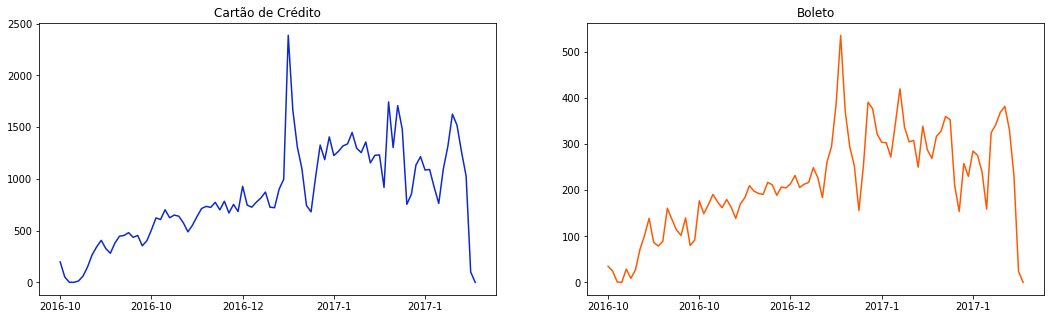

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, mensal.shape[0], 1)
dates = ["%i-%i" % (x.year, x.month) for x in mensal['date']]

#                      X, Y
fig, ax = plt.subplots(1, 2, figsize=(18,5))

ax[0].set_title('Cartão de Crédito')
ax[0].plot(x, mensal.credit_card, color='#0c29d0')
ax[0].set_xticklabels(dates)

ax[1].set_title('Boleto')
ax[1].plot(x, mensal.boleto, color = '#ff5900')
ax[1].set_xticklabels(dates)

plt.show()

### Select a great period sample

In [11]:
import datetime

dates = pd.Series([datetime.datetime(period.year, period.month, 1) for period in mensal['date']])
mensal['date'] = dates
mensal.head()

,date,credit_card,boleto,voucher,count
0,2016-10-01,198,35,14,249
1,2016-10-01,53,25,8,86
2,2016-10-01,2,1,0,3
3,2016-12-01,1,0,0,1
4,2017-01-01,14,29,4,47


In [12]:
mask = (mensal['date'] > datetime.datetime(2016, 9, 1)) & (mensal['date'] <= datetime.datetime(2018, 7, 1))
mensal = mensal[mask]
mensal.reset_index(inplace=True)

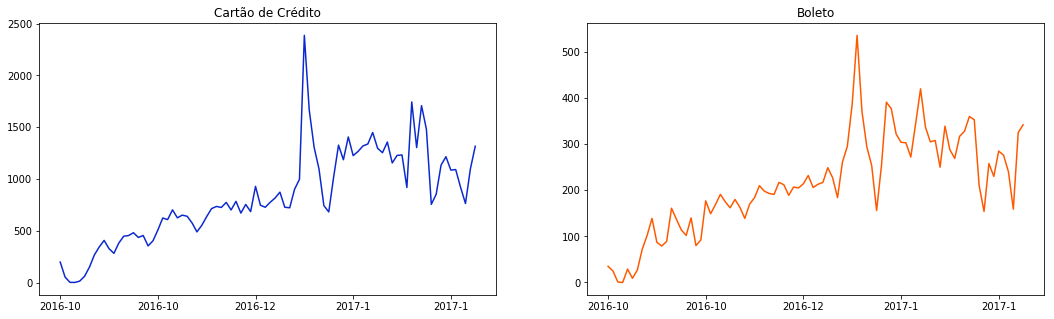

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, mensal.shape[0], 1)

#                      X, Y
fig, ax = plt.subplots(1, 2, figsize=(18,5))

dates = ["%i-%i" % (x.year, x.month) for x in mensal['date']]

ax[0].set_title('Cartão de Crédito')
ax[0].plot(x, mensal.credit_card, color='#0c29d0')
ax[0].set_xticklabels(dates)

ax[1].set_title('Boleto')
ax[1].plot(x, mensal.boleto, color = '#ff5900')
ax[1].set_xticklabels(dates)

plt.show()

### Rescale the Y

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Parse to 2D array
credit_card = [[x] for x in list(mensal.credit_card)]

# Instance and train a scaler
scaler = MinMaxScaler().fit(credit_card)

# Set the rescaled Y in the dataset
mensal['credit_card_p'] = pd.Series([x[0] for x in scaler.transform(credit_card)])

### Base line prediction using Support Vector Regression

In [15]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Train x
x = np.arange(0, mensal.shape[0], 1)
x = [[v] for v in x]

# Create the SVR models
svm = SVR(coef0=0.1)
svm.fit(x, mensal.credit_card_p)

# Create the Neural Netword Regressor models
net = MLPRegressor()
net.fit(x, mensal.credit_card_p)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
x_test = list(range(-15, mensal.shape[0] + 15))
x_test = np.array([[v] for v in x_test])

# Train the models
svr_result = pd.Series(svm.predict(x_test))
net_result = pd.Series(net.predict(x_test))

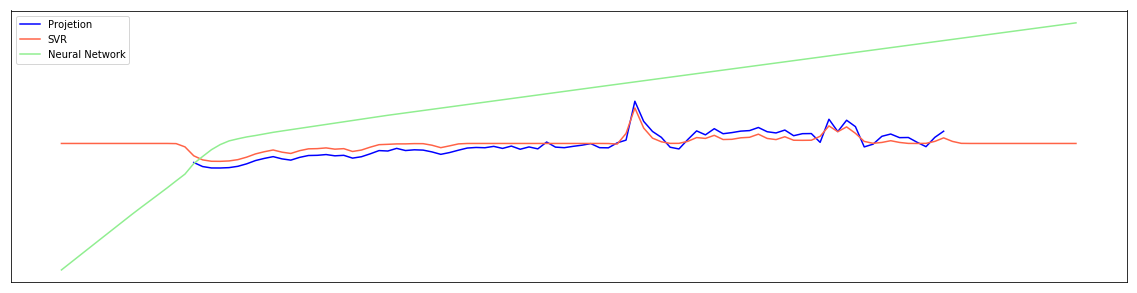

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the X
x = np.arange(0, mensal.shape[0], 1)
x_f = np.arange(x_test.min(), x_test.max()+1, 1)

plt.figure(figsize=(20, 5))

# Plot the results
plt.plot(x, mensal.credit_card_p, color = 'blue')
plt.plot(x_f, svr_result, color = 'tomato')
plt.plot(x_f, net_result, color = 'lightgreen')

# Remove the labels
plt.xticks([])
plt.yticks([])

plt.legend(['Projetion', 'SVR', 'Neural Network'])

plt.show()

### Base line prediction using LSTM Tensorflow Keras

In [18]:
!pip install -q tensorflow keras

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras import optimizers


x = np.arange(0, mensal.shape[0], 1)
x = np.array([[v] for v in x])
x = x.reshape((x.shape[0], 1, x.shape[1]))

y = mensal.credit_card_p


# design network
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x.shape[1], x.shape[2]), kernel_initializer='random_uniform'))
model.add(Dropout(0.2))


model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(50))
model.add(Dropout(0.2))

# model.add(Dense(20,activation='relu'))
model.add(Dense(1))

# compile
optimizer = optimizers.RMSprop(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# fit network
history = model.fit(x, y, epochs=300, batch_size=1000, validation_split=0.1, verbose=1, shuffle=False)

Train on 77 samples, validate on 9 samples
Epoch 1/300
77/77 [==============================] - 3s 37ms/step - loss: 0.1502 - val_loss: 0.1711
Epoch 2/300
77/77 [==============================] - 0s 155us/step - loss: 0.1314 - val_loss: 0.1390
Epoch 3/300
77/77 [==============================] - 0s 207us/step - loss: 0.1111 - val_loss: 0.0940
Epoch 4/300
77/77 [==============================] - 0s 220us/step - loss: 0.0817 - val_loss: 0.0408
Epoch 5/300
77/77 [==============================] - 0s 168us/step - loss: 0.0462 - val_loss: 0.0060
Epoch 6/300
77/77 [==============================] - 0s 219us/step - loss: 0.0175 - val_loss: 0.0123
Epoch 7/300
77/77 [==============================] - 0s 207us/step - loss: 0.0143 - val_loss: 0.0079
Epoch 8/300
77/77 [==============================] - 0s 220us/step - loss: 0.0161 - val_loss: 0.0163
Epoch 9/300
77/77 [==============================] - 0s 207us/step - loss: 0.0160 - val_loss: 0.0050
Epoch 10/300
77/77 [=============================

Epoch 81/300
77/77 [==============================] - 0s 181us/step - loss: 0.0117 - val_loss: 0.0123
Epoch 82/300
77/77 [==============================] - 0s 194us/step - loss: 0.0139 - val_loss: 0.0249
Epoch 83/300
77/77 [==============================] - 0s 207us/step - loss: 0.0117 - val_loss: 0.0175
Epoch 84/300
77/77 [==============================] - 0s 207us/step - loss: 0.0128 - val_loss: 0.0290
Epoch 85/300
77/77 [==============================] - 0s 207us/step - loss: 0.0127 - val_loss: 0.0066
Epoch 86/300
77/77 [==============================] - 0s 207us/step - loss: 0.0151 - val_loss: 0.0432
Epoch 87/300
77/77 [==============================] - 0s 207us/step - loss: 0.0145 - val_loss: 0.0060
Epoch 88/300
77/77 [==============================] - 0s 220us/step - loss: 0.0162 - val_loss: 0.0281
Epoch 89/300
77/77 [==============================] - 0s 207us/step - loss: 0.0122 - val_loss: 0.0170
Epoch 90/300
77/77 [==============================] - 0s 220us/step - loss: 0.0122

Epoch 161/300
77/77 [==============================] - 0s 181us/step - loss: 0.0111 - val_loss: 0.0105
Epoch 162/300
77/77 [==============================] - 0s 207us/step - loss: 0.0126 - val_loss: 0.0444
Epoch 163/300
77/77 [==============================] - 0s 233us/step - loss: 0.0162 - val_loss: 0.0063
Epoch 164/300
77/77 [==============================] - 0s 220us/step - loss: 0.0141 - val_loss: 0.0287
Epoch 165/300
77/77 [==============================] - 0s 220us/step - loss: 0.0092 - val_loss: 0.0168
Epoch 166/300
77/77 [==============================] - 0s 220us/step - loss: 0.0137 - val_loss: 0.0166
Epoch 167/300
77/77 [==============================] - 0s 207us/step - loss: 0.0125 - val_loss: 0.0221
Epoch 168/300
77/77 [==============================] - 0s 207us/step - loss: 0.0121 - val_loss: 0.0193
Epoch 169/300
77/77 [==============================] - 0s 194us/step - loss: 0.0102 - val_loss: 0.0119
Epoch 170/300
77/77 [==============================] - 0s 207us/step - lo

Epoch 241/300
77/77 [==============================] - 0s 181us/step - loss: 0.0105 - val_loss: 0.0165
Epoch 242/300
77/77 [==============================] - 0s 194us/step - loss: 0.0116 - val_loss: 0.0244
Epoch 243/300
77/77 [==============================] - 0s 220us/step - loss: 0.0116 - val_loss: 0.0107
Epoch 244/300
77/77 [==============================] - 0s 207us/step - loss: 0.0130 - val_loss: 0.0270
Epoch 245/300
77/77 [==============================] - 0s 220us/step - loss: 0.0108 - val_loss: 0.0085
Epoch 246/300
77/77 [==============================] - 0s 207us/step - loss: 0.0126 - val_loss: 0.0298
Epoch 247/300
77/77 [==============================] - 0s 207us/step - loss: 0.0123 - val_loss: 0.0124
Epoch 248/300
77/77 [==============================] - 0s 207us/step - loss: 0.0099 - val_loss: 0.0262
Epoch 249/300
77/77 [==============================] - 0s 207us/step - loss: 0.0119 - val_loss: 0.0098
Epoch 250/300
77/77 [==============================] - 0s 220us/step - lo

In [27]:
x_f = list(range(-5, mensal.shape[0] + 5))
x1 = np.array([[v] for v in x_f])
print(x1.shape)
x1 = x1.reshape((x1.shape[0], 1, x1.shape[1]))

result = pd.Series([v[0] for v in model.predict(x1)])

(96, 1)


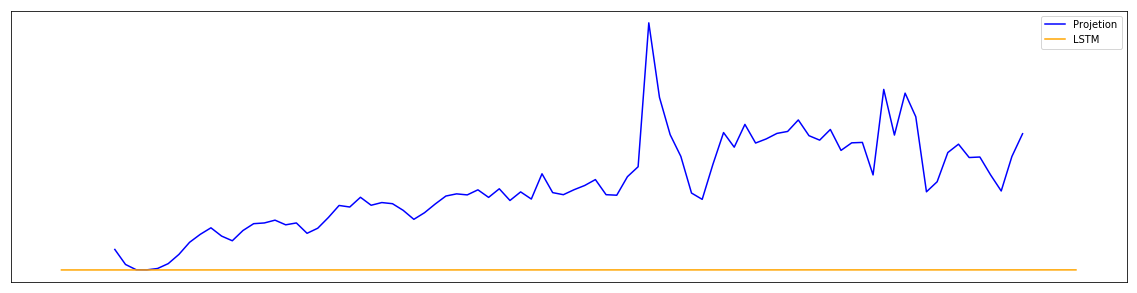

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, mensal.shape[0], 1)

plt.figure(figsize=(20, 5))

plt.plot(x, mensal.credit_card, color = 'blue')
plt.plot(x_f, result, color = 'orange')

plt.xticks([])
plt.yticks([])

plt.legend(['Projetion', 'LSTM'])

plt.show()

### ARIMA

In [22]:
!pip install -q statsmodels

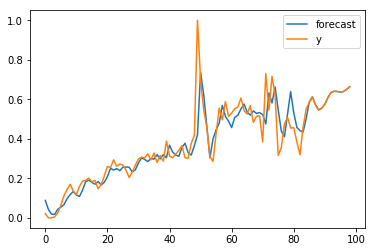

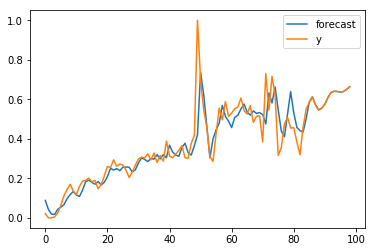

In [23]:
from statsmodels.tsa.arima_model import ARIMA

# Parse the vales
predictions = list()
actual = [x for x in mensal.credit_card_p]

# Unify the preditions with the actual
predictions.append(actual[-1])

# Repeat to predict 15 times
for _ in range(15):
    model = ARIMA(actual, order=(6, 1, 1))
    model_fit = model.fit(disp=0)
    predictions.append(model_fit.forecast()[0][0])
    actual.append(model_fit.forecast()[0][0])

# Plot the result of the prediction
model_fit.plot_predict()
model_fit.

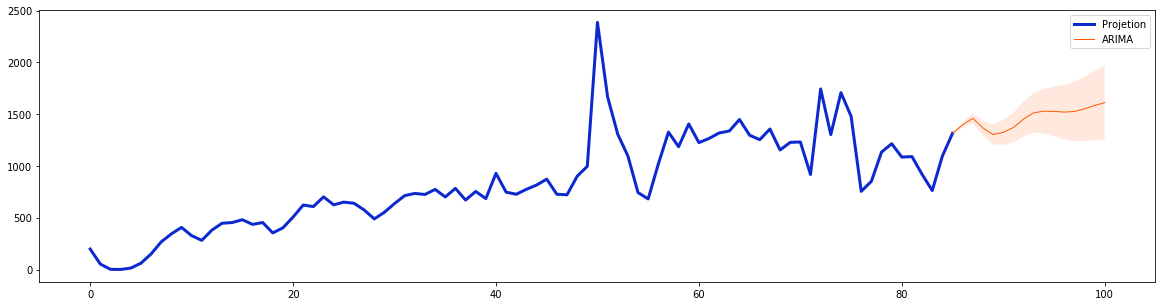

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
dates = ["%i-%i" % (x.year, x.month) for x in mensal['date']]

# X to projetion and forecast
x = np.arange(0, mensal.shape[0], 1)
x_f = np.arange(mensal.shape[0]-1, mensal.shape[0] - 1 + len(predictions), 1)

# Forecast shade
sigma = np.arange(0, len(predictions), 1)
sigma = sigma * 0.01


# Y to projetion, forecast and the forecast shade (sigma)
projetion = scaler.inverse_transform( [[x] for x in list(mensal.credit_card_p)] )
forecast = np.array([ x[0] for x in scaler.inverse_transform( [[x] for x in list(predictions)] )])
sigma = np.array([ x[0] for x in scaler.inverse_transform( [[x] for x in list(sigma)] )])


# Create a subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

ax.plot(x, projetion, color = '#0c29d0', linewidth=3)
ax.plot(x_f, forecast, color='#ff5900', linewidth=1)

# Define the forecast shade
ax.fill_between(x_f, forecast+sigma, forecast-sigma, facecolor='#ff5900', alpha=0.13)

ax.legend(['Projetion', 'ARIMA'])

plt.show()